In [14]:
%matplotlib inline
import datetime as dt                                                           
import numpy as np                                                              
import pandas as pd                                                             
from os.path import join                                                        
from kam11 import context, matchedFilter, thermister, rayModeling               
from beamforming import curvedWaveFront, timeDomain, beam_correlations          
from kam11.plotting import mfPlotting                                           
from kam11.plotting import beamformer as beam_plotting                          
from kam11.helper import baseband
import matplotlib.pyplot as plt

In [12]:
savedir = '/Users/edwardlrichards/ipythonNotebooks/nogit/beamforming_083115/'
timeOfInterest='2011 J184 03:51:15'                                             
loadDuration=dt.timedelta(0,5)                                                  
tof = dt.datetime.strptime(timeOfInterest, '%Y J%j %H:%M:%S')                   
ssp=thermister.getSoundSpeed(tof)                                               
                                                                                
thetaRange=(-8,8)                                                               
numTheta=300                                                                    
beamformingRange=(-6,2)                                                         
numBeams=301                                                                    
snap_index = 10                                                                 
uprate = 5                                                                      
look_theta = np.r_[thetaRange[0]:thetaRange[1]:numTheta*1j]                     
look_tau = np.r_[beamformingRange[0]:beamformingRange[1]:numBeams*1j]

In [3]:
mf = matchedFilter.mf_bytime(tof, loadDuration, baseband=False)                 
test_delay=curvedWaveFront.getDelays(look_theta, ssp, mf.rd, mf.rd[1])          
                                                                                
ts, mf_time = mf.single_index(snap_index)                                       
bf = timeDomain.ShiftAndAdd(ts, upsample=5)                                     
beam_result = bf.beamform(look_tau, test_delay) 

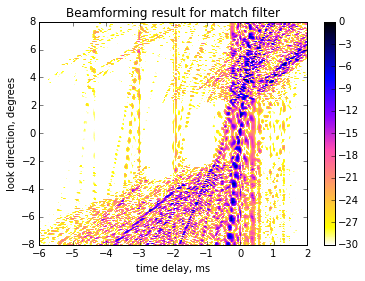

In [16]:
ax = beam_plotting.plot_beamformer(look_theta, look_tau, beam_result)
_ = plt.savefig(join(savedir, 'nonbb_bf'))

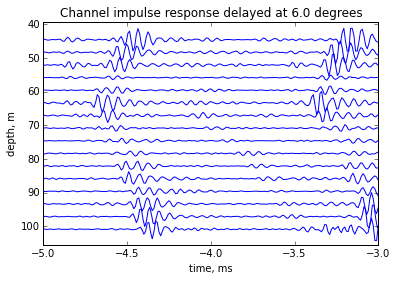

In [18]:
maxangle = beam_correlations.maxangle(beam_result, (-5, -4), (5, 7))
maxdelay = test_delay.ix[maxangle]
ax = mfPlotting.plotSingleTime(ts, isDB=False, vmax = 5e4, vmin = -5e4,
                          channel_delays=maxdelay, tStart = -5, tEnd=-3)
ax.set_title('Channel impulse response delayed at %0.1f degrees'%maxangle)
_ = plt.savefig(join(savedir, 'maxAngle_waveforms'))

In [10]:
p = np.cos(np.radians(6)) * (1/1528.9)
maxoffset = .3e-3
max_dispacement = maxoffset * 1/p

In [11]:
max_dispacement  # m

0.46119648258739809